## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def figure_size_setting(WIDTH):
    #WIDTH = 700.0  # the number latex spits out
    FACTOR = 0.8  # the fraction of the width you'd like the figure to occupy
    fig_width_pt  = WIDTH * FACTOR
    inches_per_pt = 1.0 / 72.27
    golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
    fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
    fig_height_in = fig_width_in * golden_ratio   # figure height in inches
    fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list
    return fig_dims

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 15
plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Arial'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.default'] = 'regular'

## Load simulated data, GCN (Gene Content Network) and PCN (Protein Content Network)

In [2]:
#### read a pickle file
import pickle
pickle_in = open("model_simulation_results.pickle", "rb")
######## "consumption_mat" is the truely expressed consumption functions,
######## "consumption_mat_red_genome" is the consumption functions encoded in genomes,
######## "met_ess_red" is the truely expressed essential functions, 
######## "met_ess_red_genome" is the essential functions encoded in genomes
[i_survivors, abundance_survivors, m2b_full_before_evolution, m2b_full, consumption_mat, consumption_mat_red_genome, consumption_mat_red, met_ess_full_before_evolution, met_ess_full, met_ess, met_ess_red_genome, met_ess_red] = pickle.load(pickle_in)

Nb = consumption_mat.shape[0] 
Nr = consumption_mat.shape[1]
Ne = met_ess.shape[0]
yield_mat = consumption_mat.copy()
depletion_mat = consumption_mat.copy().transpose()
i_microbe_subset = range(consumption_mat.shape[0])
abundance_survivors_ori = abundance_survivors.copy()


## Compute the gene-level functional redundancy $\text{FR}_g$ and the protein-level functional redundancy $\text{FR}_p$

In [3]:
capability_redundancy_list1 = []
function_redundancy_list1 = []
for i in range(consumption_mat_red.shape[1]):
    distance_weighted = (consumption_mat_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (consumption_mat_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list1 = capability_redundancy_list1 + [capability_redundancy]
    function_redundancy_list1 = function_redundancy_list1 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

In [4]:
capability_redundancy_list2 = []
function_redundancy_list2 = []
for i in range(met_ess_red.shape[1]):
    distance_weighted = (met_ess_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (met_ess_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list2 = capability_redundancy_list2 + [capability_redundancy]
    function_redundancy_list2 = function_redundancy_list2 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

In [5]:
import matplotlib as mpl
def make_ellipses(gmm, ax, colors):
    #colors = ['blue', 'red', 'green']
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        print(gmm.means_[n, :2], v[0], v[1])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

[[24.45  2.1 ]
 [26.7  23.7 ]
 [ 7.    1.6 ]]
[24.44999769  2.09999985] 2.464119522929604 6.973404657814816
[26.7 23.7] 3.2640949108645145 12.895956774186015
[6.99999933 1.60000006] 1.9900761180982347 6.352920506625667
[[0.47777192 0.00547659]
 [0.54803998 0.44647347]
 [0.03334891 0.00103977]]
[0.46719217 0.00583706] 0.02332649388353366 0.3737557818921953
[0.55855636 0.45648243] 0.13287717114046185 0.658672352527442
[0.0331647  0.00103078] 0.0061831072673948564 0.06003384993220655


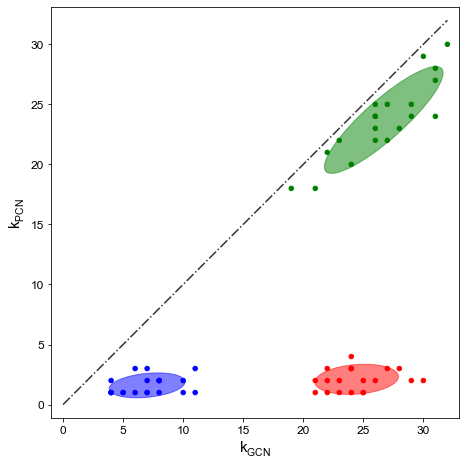

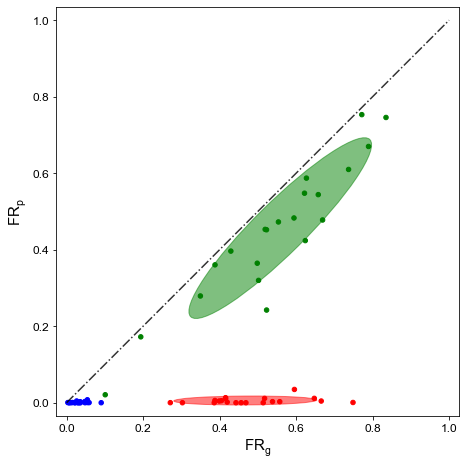

In [6]:
#### GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestCentroid
degree_GCN1 = (consumption_mat_red_genome>0).sum(0)
degree_PCN1 = (consumption_mat_red>0).sum(0)
degree_GCN2 = (met_ess_red_genome>0).sum(0)
degree_PCN2 = (met_ess_red>0).sum(0)
x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
from pandas import DataFrame
from sklearn.cluster import KMeans
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
gmm = GaussianMixture(n_components=3).fit(df.values)
y_hc = gmm.predict(df.values)
clf = NearestCentroid()
clf.fit(df.values, y_hc)
centroids = clf.centroids_
print(centroids)
fig_dims = figure_size_setting(600)
fig_dims = [fig_dims[0], fig_dims[0]*1]
fig, axes = plt.subplots(1, 1, figsize=fig_dims, sharex=True)
rank = np.argsort(np.argsort(np.sum(centroids, 1))) #[specialist, niche, essential]
color_list = ['blue', 'red', 'green']
cmap = list(map(lambda x: color_list[rank[x]], y_hc))
axes.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
make_ellipses(gmm, axes, list(np.array(color_list)[rank]))
axes.plot([0, np.max(x)], [0, np.max(x)], 'k-.', alpha=0.8, lw=1.5)
axes.set_xlabel("$k_{GCN}$")
axes.set_ylabel("$k_{PCN}$")
axes.set_aspect('equal')
fig.tight_layout()
#fig.savefig("../figures/Fig4c.pdf", dpi=300)

x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
from pandas import DataFrame
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
gmm = GaussianMixture(n_components=3).fit(df.values)
y_hc = gmm.predict(df.values)
clf = NearestCentroid()
clf.fit(df.values, y_hc)
centroids = clf.centroids_
print(centroids)
fig_dims = figure_size_setting(600)
fig_dims = [fig_dims[0], fig_dims[0]*1]
fig, axes = plt.subplots(1, 1, figsize=fig_dims, sharex=True)
rank = np.argsort(np.argsort(np.sum(centroids, 1))) #[specialist, niche, essential]
color_list = ['blue', 'red', 'green']
cmap = list(map(lambda x: color_list[rank[x]], y_hc))
axes.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
make_ellipses(gmm, axes, list(np.array(color_list)[rank]))
#axes.plot([0, np.max(x)], [0, np.max(x)], 'k-.', alpha=0.8, lw=1.5)
axes.plot([0, 1], [0, 1], 'k-.', alpha=0.8, lw=1.5)
axes.set_xlabel("$FR_g$")
axes.set_ylabel("$FR_p$")
axes.set_aspect('equal')
fig.tight_layout()
#fig.savefig("../figures/Fig4d.pdf", dpi=300)


In [7]:
x1 = capability_redundancy_list1 + capability_redundancy_list2
y1 = function_redundancy_list1 + function_redundancy_list2
x2 = list(degree_GCN1) + list(degree_GCN2)
y2 = list(degree_PCN1) + list(degree_PCN2)
print(x1)
print(y1)
print(x2)
print(y2)


[0.6656944962819956, 0.6475339431531657, 0.5955855594281267, 0.45636494373652103, 0.4428407862479843, 0.3989265864817652, 0.419805975486156, 0.40495623492064187, 0.5139994356020577, 0.46882588584497215, 0.5176032358147544, 0.41562486179014746, 0.3859450660894762, 0.5383278416047659, 0.3878259930431616, 0.27111162067852285, 0.7487525439774433, 0.5572808465333579, 0.3028221191842361, 0.41561038458458427, 0.0032473009364543674, 0.030922232876440622, 0.035476949455513045, 0.0363513671339007, 0.02867524385675189, 0.021458544404924375, 0.04819591103098346, 0.10100072783988072, 0.015152803454777524, 0.09046249907525106, 0.012303365659776551, 0.006198542776890545, 0.05459863907108794, 0.02181362278348311, 0.007587041722513803, 0.05432750623315163, 0.026323117676396748, 0.04761226119935232, 0.034092673592562316, 0.05882972077371699, 0.5944670126259743, 0.4984273665943071, 0.7371708337260298, 0.38803947290604746, 0.34979016611053965, 0.6692582563139708, 0.5228315976212512, 0.5226502106096081, 0.

In [8]:
x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))

x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))


0.47777191802419183 0.005476586076076795
0.036731503577690484 0.0020299726031935265
0.57039193737643 0.46775495531421296
24.45 2.1
7.0 1.6
26.7 23.7


In [9]:
abundance_survivors.shape


(35,)

## Randomly pick species from the initial pool with equal abundances

In [10]:
N_survivors = consumption_mat_red.shape[0]
lst = range(0,Nb)
i_randomly_picked_species = random.choices(range(0,Nb), k=N_survivors)
abundance_survivors = np.ones(N_survivors)
#i_randomly_picked_species = [4250, 7931, 5798, 4009, 9013, 3906, 1046, 3738, 2764, 718, 2291, 756, 9972, 2456, 6553, 6346, 6412, 5527, 2249, 3125, 3591, 9619, 7024, 3934, 7339, 5931, 2279, 5128, 364, 1431, 5924, 3302, 9724, 8123, 7600]
print(i_randomly_picked_species)
consumption_mat_red = consumption_mat[i_randomly_picked_species,:]
consumption_mat_red_genome = m2b_full.transpose()[i_randomly_picked_species,:]
consumption_mat_red = consumption_mat[i_randomly_picked_species,:]
consumption_mat_red_genome = m2b_full.transpose()[i_randomly_picked_species,:]
met_ess_red = met_ess.transpose()[i_randomly_picked_species,:]
met_ess_red_genome = met_ess_full.transpose()[i_randomly_picked_species,:]

[4250, 7931, 5798, 4009, 9013, 3906, 1046, 3738, 2764, 718, 2291, 756, 9972, 2456, 6553, 6346, 6412, 5527, 2249, 3125, 3591, 9619, 7024, 3934, 7339, 5931, 2279, 5128, 364, 1431, 5924, 3302, 9724, 8123, 7600]


In [11]:
capability_redundancy_list1 = []
function_redundancy_list1 = []
for i in range(consumption_mat_red.shape[1]):
    distance_weighted = (consumption_mat_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (consumption_mat_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list1 = capability_redundancy_list1 + [capability_redundancy]
    function_redundancy_list1 = function_redundancy_list1 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

In [12]:
capability_redundancy_list2 = []
function_redundancy_list2 = []
for i in range(met_ess_red.shape[1]):
    distance_weighted = (met_ess_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (met_ess_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list2 = capability_redundancy_list2 + [capability_redundancy]
    function_redundancy_list2 = function_redundancy_list2 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

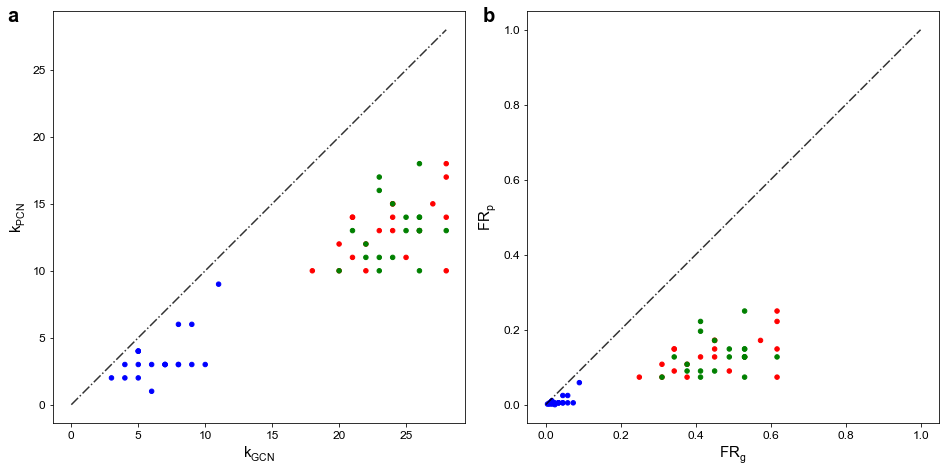

In [13]:
#### GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestCentroid
degree_GCN1 = (consumption_mat_red_genome>0).sum(0)
degree_PCN1 = (consumption_mat_red>0).sum(0)
degree_GCN2 = (met_ess_red_genome>0).sum(0)
degree_PCN2 = (met_ess_red>0).sum(0)
x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
from pandas import DataFrame
from sklearn.cluster import KMeans
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
fig_dims = figure_size_setting(600)
fig_dims = [fig_dims[0]*2, fig_dims[0]*1]
fig, axes = plt.subplots(1, 2, figsize=fig_dims)

ax = axes[0]
color_list = ['blue', 'red', 'green']
cmap = ['red']*int(Nr/2) + ['blue']*Ne + ['green']*int(Nr/2)
ax.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
ax.plot([0, np.max(x)], [0, np.max(x)], 'k-.', alpha=0.8, lw=1.5)
ax.set_xlabel("$k_{GCN}$")
ax.set_ylabel("$k_{PCN}$")
ax.set_aspect('equal')
ax.text(-0.11, 1.01, '$a$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')

x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
from pandas import DataFrame
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
ax = axes[1]
cmap = ['red']*int(Nr/2) + ['blue']*Ne + ['green']*int(Nr/2)
ax.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
ax.plot([0, 1], [0, 1], 'k-.', alpha=0.8, lw=1.5)
ax.set_xlabel("$FR_g$")
ax.set_ylabel("$FR_p$")
ax.set_aspect('equal')
ax.text(-0.11, 1.01, '$b$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')
fig.tight_layout()
#fig.savefig("../figures/Fig2_random_species_equal_abundances.pdf", dpi=300)


In [14]:
x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))

x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))


0.446530612244898 0.1325714285714286
0.03379591836734693 0.009551020408163264
0.4635918367346939 0.13232653061224492
23.7 13.05
6.6 3.5
24.25 13.05


## Randomly pick species from the initial pool with abundances same as those of survived species

In [15]:
N_survivors = consumption_mat_red.shape[0]
lst = range(0,Nb)
i_randomly_picked_species = random.choices(range(0,Nb), k=N_survivors)
abundance_survivors = abundance_survivors_ori.copy() # np.ones(N_survivors)
#i_randomly_picked_species = [4250, 7931, 5798, 4009, 9013, 3906, 1046, 3738, 2764, 718, 2291, 756, 9972, 2456, 6553, 6346, 6412, 5527, 2249, 3125, 3591, 9619, 7024, 3934, 7339, 5931, 2279, 5128, 364, 1431, 5924, 3302, 9724, 8123, 7600]
print(i_randomly_picked_species)
consumption_mat_red = consumption_mat[i_randomly_picked_species,:]
consumption_mat_red_genome = m2b_full.transpose()[i_randomly_picked_species,:]
consumption_mat_red = consumption_mat[i_randomly_picked_species,:]
consumption_mat_red_genome = m2b_full.transpose()[i_randomly_picked_species,:]
met_ess_red = met_ess.transpose()[i_randomly_picked_species,:]
met_ess_red_genome = met_ess_full.transpose()[i_randomly_picked_species,:]

[4250, 7931, 5798, 4009, 9013, 3906, 1046, 3738, 2764, 718, 2291, 756, 9972, 2456, 6553, 6346, 6412, 5527, 2249, 3125, 3591, 9619, 7024, 3934, 7339, 5931, 2279, 5128, 364, 1431, 5924, 3302, 9724, 8123, 7600]


In [16]:
capability_redundancy_list1 = []
function_redundancy_list1 = []
for i in range(consumption_mat_red.shape[1]):
    distance_weighted = (consumption_mat_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (consumption_mat_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list1 = capability_redundancy_list1 + [capability_redundancy]
    function_redundancy_list1 = function_redundancy_list1 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

In [17]:
capability_redundancy_list2 = []
function_redundancy_list2 = []
for i in range(met_ess_red.shape[1]):
    distance_weighted = (met_ess_red_genome>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    capability_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    distance_weighted = (met_ess_red>0).astype(int)[:,i] * abundance_survivors / np.sum(abundance_survivors)
    function_redundancy = np.sum(np.outer(distance_weighted, distance_weighted)) - np.sum(np.diag(np.outer(distance_weighted, distance_weighted)))
    capability_redundancy_list2 = capability_redundancy_list2 + [capability_redundancy]
    function_redundancy_list2 = function_redundancy_list2 + [function_redundancy]
    #print(capability_redundancy, function_redundancy)
    

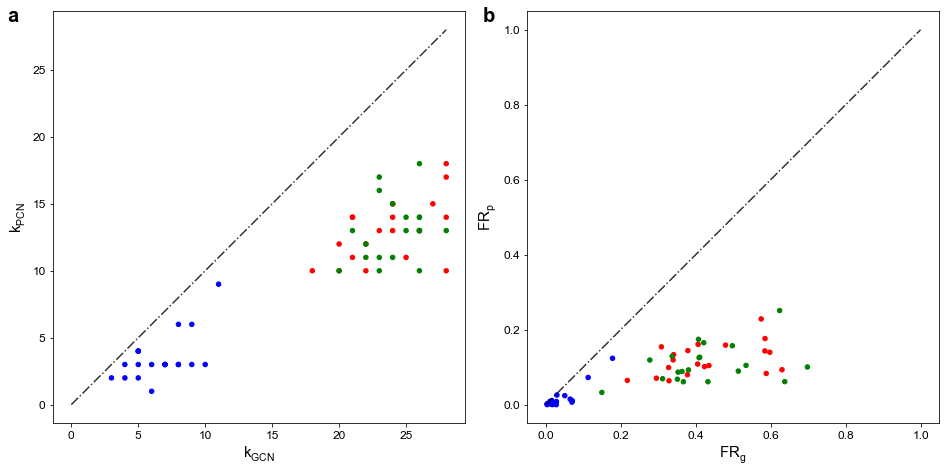

In [18]:
#### GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestCentroid
degree_GCN1 = (consumption_mat_red_genome>0).sum(0)
degree_PCN1 = (consumption_mat_red>0).sum(0)
degree_GCN2 = (met_ess_red_genome>0).sum(0)
degree_PCN2 = (met_ess_red>0).sum(0)
x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
from pandas import DataFrame
from sklearn.cluster import KMeans
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
fig_dims = figure_size_setting(600)
fig_dims = [fig_dims[0]*2, fig_dims[0]*1]
fig, axes = plt.subplots(1, 2, figsize=fig_dims)

ax = axes[0]
color_list = ['blue', 'red', 'green']
cmap = ['red']*int(Nr/2) + ['blue']*Ne + ['green']*int(Nr/2)
ax.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
ax.plot([0, np.max(x)], [0, np.max(x)], 'k-.', alpha=0.8, lw=1.5)
ax.set_xlabel("$k_{GCN}$")
ax.set_ylabel("$k_{PCN}$")
ax.set_aspect('equal')
ax.text(-0.11, 1.01, '$a$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')

x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
from pandas import DataFrame
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
ax = axes[1]
cmap = ['red']*int(Nr/2) + ['blue']*Ne + ['green']*int(Nr/2)
ax.scatter(df['x'], df['y'], c=cmap, s=20, alpha=1.0)
ax.plot([0, 1], [0, 1], 'k-.', alpha=0.8, lw=1.5)
ax.set_xlabel("$FR_g$")
ax.set_ylabel("$FR_p$")
ax.set_aspect('equal')
ax.text(-0.11, 1.01, '$b$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')
fig.tight_layout()
#fig.savefig("../SI figures/figures/Fig2_random_species.pdf", dpi=300)


In [19]:
x = capability_redundancy_list1 + capability_redundancy_list2
y = function_redundancy_list1 + function_redundancy_list2
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))

x = list(degree_GCN1) + list(degree_GCN2)
y = list(degree_PCN1) + list(degree_PCN2)
print(np.mean(x[:int(Nr/2)]), np.mean(y[:int(Nr/2)]))
print(np.mean(x[int(Nr/2):Nr]), np.mean(y[int(Nr/2):Nr]))
print(np.mean(x[Nr:]), np.mean(y[Nr:]))


0.4314694757780784 0.12141155869334411
0.039620257421440416 0.016226231903575073
0.4240828041171807 0.10820874267245484
23.7 13.05
6.6 3.5
24.25 13.05
